In [1]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray
from skimage import io

import glob
import os
import pathlib
import pandas as pd
import numpy as np

%matplotlib inline

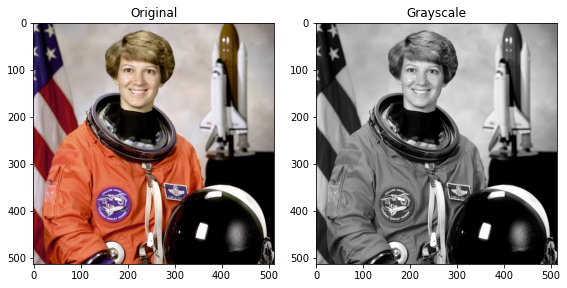

In [2]:
original = data.astronaut()
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [2]:
dataset_path=os.getcwd()+os.sep+"images"
imgs=glob.glob(dataset_path+os.sep+"*.jpg")
len(imgs)

394

In [3]:
print(type(imgs[0]))
img0=io.imread(imgs[0])
print(type(img0))

<class 'str'>
<class 'numpy.ndarray'>


In [4]:
img0.shape
# original image is 934 x 294 with 3 bands

(934, 294, 3)

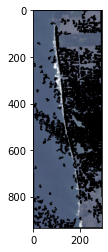

In [5]:
i,img1=plt.subplots(1)
i.set_figwidth(15)
img1.imshow(img0)

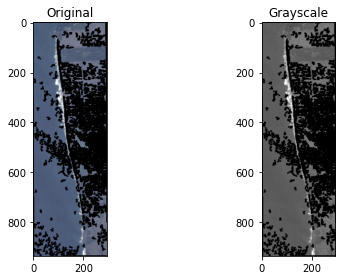

In [6]:
original = img0
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

## Goal #1 Create a pipeline to preprocesses all the images
1. convert images to grayscale
2. Normalize the images
3. Perform Data Augmentation
4. Image Standardization

## Goal #2 Read all the images and labels from the csv


In [7]:
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from tensorflow.keras import optimizers

In [8]:
train_datagen=ImageDataGenerator(rescale=1./255.,
rotation_range=20,
zoom_range=0.05,
width_shift_range=0.05,
height_shift_range=0.05,
shear_range=0.05,
horizontal_flip=True,
fill_mode="nearest",
validation_split=0.20
)

test_datagen=ImageDataGenerator(rescale=1./255.)


# Read in the  csv file and transform in df
1. read in the csv
2. one hot encode the sorted labels
3. Update the one hot encoded labels to strings

In [22]:
dataset_path=os.getcwd()+os.sep+"images"
labels=["good","bad"]
df =  pd.read_csv("Sniffer_Output_17_03_2022_hr_17_03.csv")
df.drop(['index'],axis=1,inplace=True)
df

,Filename,Sorted
0,2009-12-01-18-36-33_L5_rgb.jpg,good
1,2017-10-11-18-52-32_L8_rgb.jpg,bad
2,2014-02-05-18-53-15_L8_rgb.jpg,good
3,2003-10-14-18-23-57_L5_rgb.jpg,good
4,2013-12-12-18-47-38_L8_rgb.jpg,good
...,...,...
389,2018-11-24-18-46-00_L8_rgb.jpg,bad
390,2002-09-09-18-20-07_L5_rgb.jpg,good
391,2016-10-01-18-46-19_L8_rgb.jpg,good
392,2001-05-01-18-26-16_L5_rgb.jpg,good


In [10]:
### map each label(good or bad) to an integer
mapping = {}
for x in range(len(labels)):
  mapping[labels[x]] = x
# outputs {'good': 0, 'bad': 1}
print(mapping)
# integer representation
for x in range(len(df['Sorted'])):
  df['Sorted'][x] = mapping[df['Sorted'][x]]
print("\n",df['Sorted'])

{'good': 0, 'bad': 1}

 0      0
1      1
2      0
3      0
4      0
      ..
389    1
390    0
391    0
392    0
393    0
Name: Sorted, Length: 394, dtype: object


In [11]:
df

,Filename,Sorted
0,2009-12-01-18-36-33_L5_rgb.jpg,0
1,2017-10-11-18-52-32_L8_rgb.jpg,1
2,2014-02-05-18-53-15_L8_rgb.jpg,0
3,2003-10-14-18-23-57_L5_rgb.jpg,0
4,2013-12-12-18-47-38_L8_rgb.jpg,0
...,...,...
389,2018-11-24-18-46-00_L8_rgb.jpg,1
390,2002-09-09-18-20-07_L5_rgb.jpg,0
391,2016-10-01-18-46-19_L8_rgb.jpg,0
392,2001-05-01-18-26-16_L5_rgb.jpg,0


In [26]:

# Converted the sorted column to string otherwises data generator will not work
df["Sorted"]=df["Sorted"].astype(str)
# Split the dataframe into a train and test set into a .75 and .25 training and test set respectively
traindf=df.iloc[:296,:] # get the first 296 rows
testdf=df.iloc[296:,:] # get the  remaining 98 rows

# Get the x and y column names from the csv file
x_col_name=df.columns[0]
y_col_name=df.columns[1]

print(traindf)
print(testdf)

Filename
Sorted
                           Filename Sorted
0    2009-12-01-18-36-33_L5_rgb.jpg   good
1    2017-10-11-18-52-32_L8_rgb.jpg    bad
2    2014-02-05-18-53-15_L8_rgb.jpg   good
3    2003-10-14-18-23-57_L5_rgb.jpg   good
4    2013-12-12-18-47-38_L8_rgb.jpg   good
..                              ...    ...
291  2017-06-14-18-45-46_L8_rgb.jpg   good
292  2014-09-01-18-52-21_L8_rgb.jpg   good
293  2005-06-13-18-33-36_L5_rgb.jpg   good
294  2008-09-25-18-30-49_L5_rgb.jpg   good
295  2005-04-10-18-33-11_L5_rgb.jpg   good

[296 rows x 2 columns]
                           Filename Sorted
296  2002-10-11-18-19-06_L5_rgb.jpg   good
297  2019-06-04-18-45-50_L8_rgb.jpg   good
298  2021-07-27-18-46-06_L8_rgb.jpg    bad
299  2017-04-02-18-51-49_L8_rgb.jpg    bad
300  2016-09-06-18-52-28_L8_rgb.jpg   good
..                              ...    ...
389  2018-11-24-18-46-00_L8_rgb.jpg    bad
390  2002-09-09-18-20-07_L5_rgb.jpg   good
391  2016-10-01-18-46-19_L8_rgb.jpg   good
392  2001-05-0

In [ ]:
# Get the average size of each image


## Augment the images 
- resize the images from 934 x 294 to 900x294

In [29]:
train_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=dataset_path,
x_col=x_col_name, #image filenames
y_col=y_col_name,   # class names in this case good/bad
subset="training",
batch_size=37,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(900,250))


Found 237 validated image filenames belonging to 2 classes.


In [30]:
valid_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=dataset_path,
x_col=x_col_name, #image filenames
y_col=y_col_name,   # class names in this case good/bad
subset="validation", #only difference is this
batch_size=37, #296/8=37
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(900,250))

Found 59 validated image filenames belonging to 2 classes.


In [15]:

test_generator=test_datagen.flow_from_dataframe(
dataframe=testdf,
directory="./images/",
x_col=x_col_name, #image filenames
y_col=None,
batch_size=14, #98/7=14
seed=42,
shuffle=False,
class_mode=None,
target_size=(900,250))

Found 197 validated image filenames.


In [16]:
def prepare_model():
    model = keras.Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(900, 250, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

In [17]:
model = prepare_model()
model.fit(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=5)

Epoch 1/5
4/4 [==============================] - 69s 16s/step - loss: 10.5064 - accuracy: 0.6797 - val_loss: 25.3756 - val_accuracy: 0.5938
Epoch 2/5
4/4 [==============================] - 34s 8s/step - loss: 15.9231 - accuracy: 0.7031 - val_loss: 8.1947 - val_accuracy: 0.8438
Epoch 3/5
4/4 [==============================] - 28s 7s/step - loss: 5.7718 - accuracy: 0.7969 - val_loss: 0.6735 - val_accuracy: 0.3750
Epoch 4/5
4/4 [==============================] - 25s 6s/step - loss: 0.7179 - accuracy: 0.3095 - val_loss: 0.6399 - val_accuracy: 0.3438
Epoch 5/5
4/4 [==============================] - 24s 6s/step - loss: 0.6431 - accuracy: 0.5556 - val_loss: 0.6096 - val_accuracy: 0.7812


In [18]:
score = model.evaluate(valid_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 5s 646ms/step - loss: 0.9005 - accuracy: 0.6667
Test loss: 0.9005183577537537
Test accuracy: 0.6666666865348816


In [39]:
# Write the test scores to a file
import csv
csv_file_path=os.getcwd()+os.sep+"test_results"+os.sep+"modelScores.csv"
if not os.path.exists(csv_file_path):
    with open(csv_file_path, 'w', newline='') as outcsv:
        writer = csv.writer(outcsv)
        writer.writerow(["Accuracy", "Test Loss", "Model Description"])
elif os.path.exists(csv_file_path):
    with open(csv_file_path, 'a', newline='') as outcsv:
            writer = csv.writer(outcsv)
            writer.writerow([score[1], score[0], "sigmoid activation"])


In [46]:
# model =  keras.Sequential()
# model.add(Conv2D(32, (3, 3), padding='same',
#                  input_shape=(32,32,3)))
# model.add(Activation('relu'))
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))
# model.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

In [89]:
# STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
# STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
# model.fit(train_generator,
#                     steps_per_epoch=STEP_SIZE_TRAIN,
#                     validation_data=valid_generator,
#                     validation_steps=STEP_SIZE_VALID,
#                     epochs=10
# )